<a href="https://colab.research.google.com/github/tinodasso85/crudapidjango4/blob/main/ProyectoDS_Netflix_Dasso_Mart%C3%ADn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

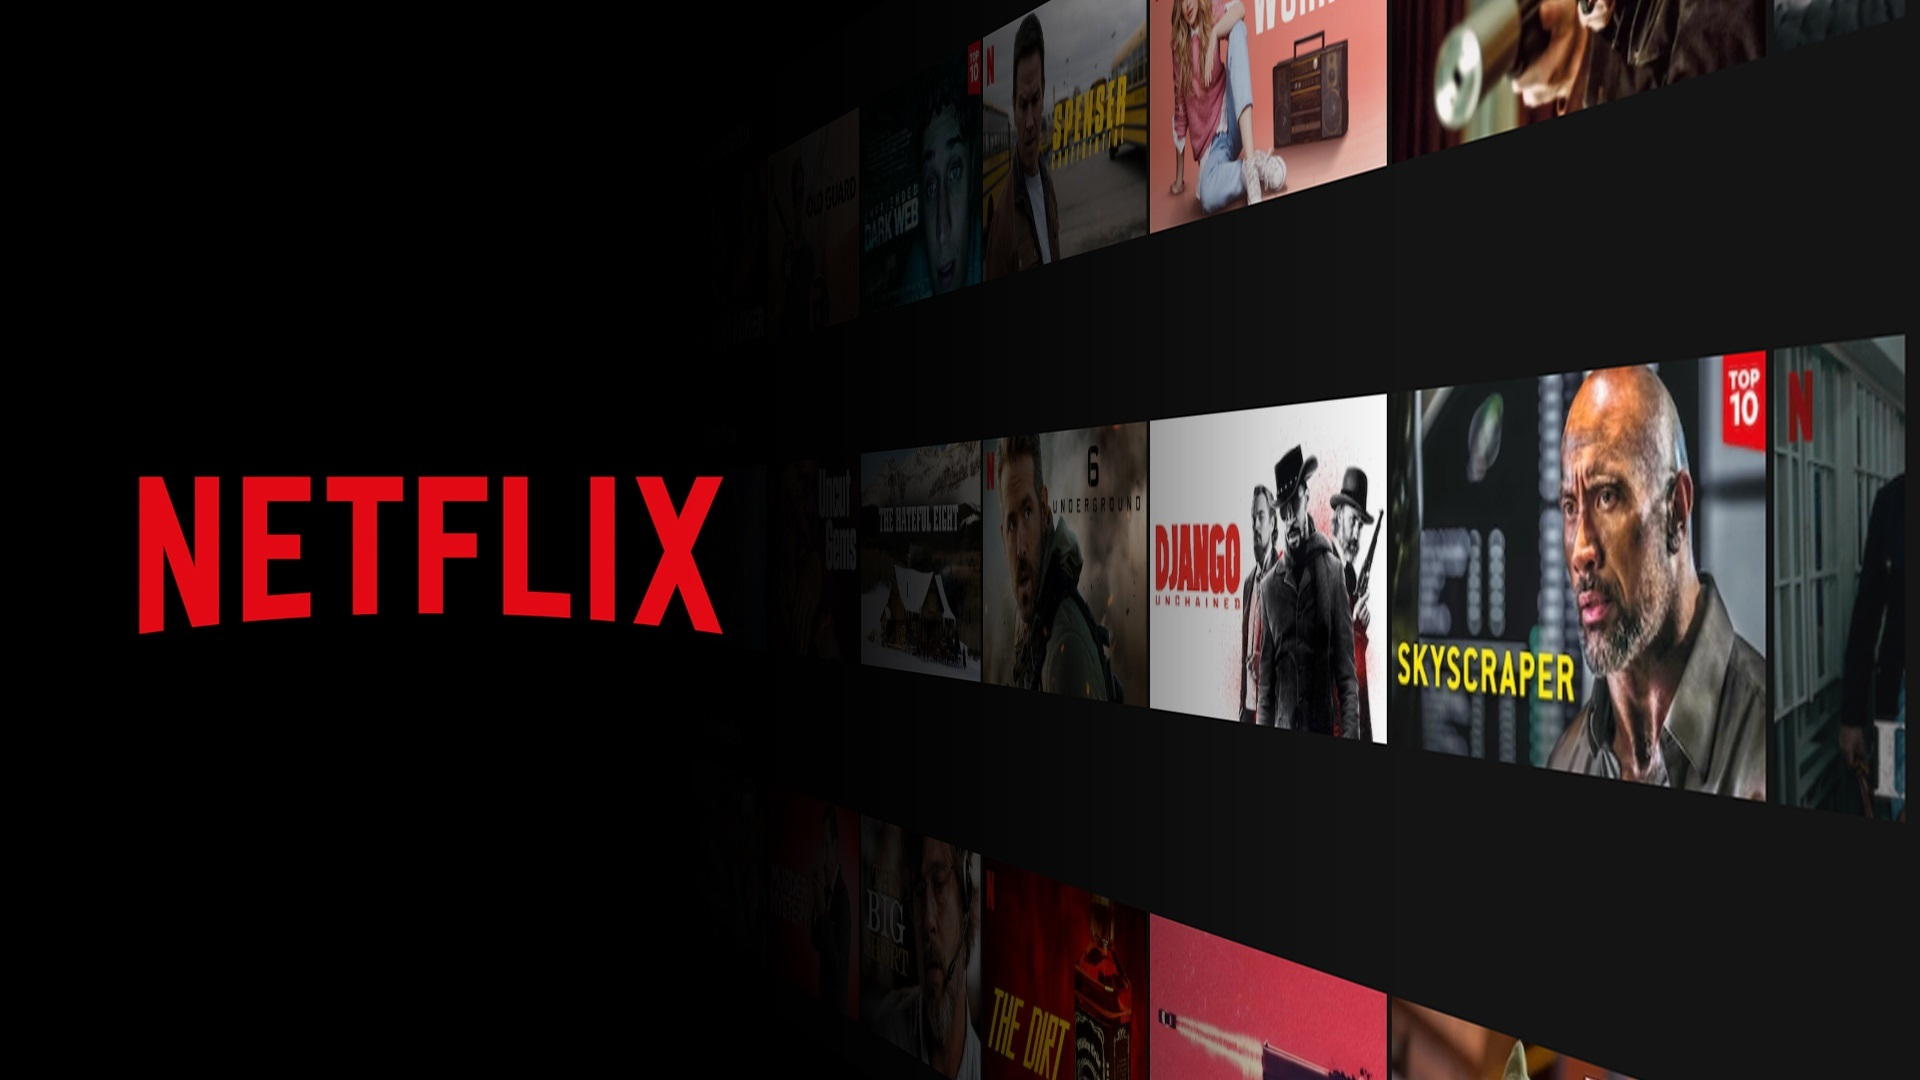

# ***NETFLIX***
Este proyecto se basa en el análisis de un dataset de ***Netflix*** que contiene información sobre películas y series disponibles en la plataforma desde el *31 de diciembre de 2007*  hasta el *29 de noviembre de 2019*. El dataset incluye variables como el título, género, director, actores principales, país de origen, fecha de lanzamiento y calificaciones. El objetivo principal de este análisis es explorar las características y tendencias en el contenido que ofrece ***Netflix***, así como identificar patrones y relaciones entre diferentes variables. A través de visualizaciones y análisis estadísticos, buscaremos responder preguntas clave sobre la popularidad de diferentes géneros, la evolución del contenido que ofrece ***Netflix*** a lo largo del tiempo, la relación entre los factores como el país de origen y las calificaciones de los usuarios. etc

# **Objetivo**:
El objetivo de este proyecto es analizar el catálogo de Netflix para identificar patrones y tendencias mediante técnicas de análisis de datos y aprendizaje automático. Además, se busca predecir el éxito de los títulos basándonos en variables como género, actores, directores, etc.

# **Contexto Comercial**:
Netflix, una de las principales plataformas de streaming a nivel mundial, necesita comprender las tendencias y preferencias de su catálogo para tomar decisiones informadas sobre la adquisición y producción de contenido. Predecir el éxito de nuevos títulos puede optimizar la inversión en marketing y producción.

# **Contexto Analítico**:
Utilizaremos técnicas de análisis de datos y aprendizaje automático, incluyendo la limpieza y preprocesamiento de datos, análisis exploratorio de datos (EDA), reducción de dimensionalidad y aplicación de algoritmos de clustering para identificar patrones.

## Preguntas e Hipótesis ##
1. ¿Cuáles son los géneros más frecuentes en ***Netflix***?
**Hipótesis**: Los géneros de drama y comedia son los más comunes de ***Netflix***.


2. ¿Cómo ha cambiado el contenido de ***Netflix*** a lo largo de los años?  
**Hipótesis**: El número de títulos disponibles en ***Netflix*** ha aumentado significativamente en los últimos años, con una tendencia creciente en producciones originales.


3. ¿Existe una relación entre el país de origen de una producción y su popularidad en la plataforma?  
**Hipótesis**: Las producciones de Estados Unidos tienden a ser más populares en la plataforma debido a su alta calidad de producción y marketing.


4. ¿Las calificaciones de los usuarios tienden a ser más altas para las series que para las películas?
**Hipótesis**: Las series tienden a recibir mejores calificaciones debido a su formato extendido y desarrollo de personajes.


5. ¿Cual es la distribución de la duración de películas y series en ***Netflix***?
**Hipótesis**: Las películas tienen una mayor variabilidad en la duración que las series.


6. ¿Cuál es la relación entre el año de lanzamiento y la cantidad de contenido añadido a ***Netflix***?
**Hipótesis**: La cantidad de contenido añadido a ***Netflix*** ha aumentado significativamente en los últimos años.

# **CARGA DE DATASET**

In [ ]:
from google.colab import drive
import pandas as pd

# Montar Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Ruta al archivo en Google Drive
file_path = '/content/drive/My Drive/01.Primera PRE-Entrega (Dasso, Martín)/netflix_titles_nov_2019.csv'

In [ ]:
# Cargar el dataset
df = pd.read_csv(file_path)

# **EXPLORACIÓN GRAL DEL DF**

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5837 entries, 0 to 5836
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5837 non-null   int64 
 1   title         5837 non-null   object
 2   director      3936 non-null   object
 3   cast          5281 non-null   object
 4   country       5410 non-null   object
 5   date_added    5195 non-null   object
 6   release_year  5837 non-null   int64 
 7   rating        5827 non-null   object
 8   duration      5837 non-null   object
 9   listed_in     5837 non-null   object
 10  description   5837 non-null   object
 11  type          5837 non-null   object
dtypes: int64(2), object(10)
memory usage: 547.3+ KB
None


In [ ]:
# Mostrar las primeras filas del dataset
print(df.head())

    show_id                                title                    director  \
0  81193313                            Chocolate                         NaN   
1  81197050  Guatemala: Heart of the Mayan World  Luis Ara, Ignacio Jaunsolo   
2  81213894                      The Zoya Factor             Abhishek Sharma   
3  81082007                            Atlantics                   Mati Diop   
4  80213643                      Chip and Potato                         NaN   

                                                cast  \
0  Ha Ji-won, Yoon Kye-sang, Jang Seung-jo, Kang ...   
1                                  Christian Morales   
2  Sonam Kapoor, Dulquer Salmaan, Sanjay Kapoor, ...   
3  Mama Sane, Amadou Mbow, Ibrahima Traore, Nicol...   
4  Abigail Oliver, Andrea Libman, Briana Buckmast...   

                    country         date_added  release_year rating  \
0               South Korea  November 30, 2019          2019  TV-14   
1                       NaN  November 30

# Descripción de las Columnas

*   **show_id**: *Identificador único del título en Netflix.*
*   **title**: 	*Nombre del título.*
*   **cast**: *Lista de actores que participan en el título.*
*  **country**: *País* de origen del título.
*   **date_added**:	*Fecha en que el título fue añadido a Netflix.*
*   **release_year**: *Año en que el título fue lanzado*
*   **rating**:	*Clasificación del título según el público al que está dirigido (por ejemplo, TV-Y, PG-13, etc.).*
*   **duration**:	*Duración del título (en minutos para películas, en temporadas para series).*
*   **listed_in**:	*Géneros a los que pertenece el título.*
*   **description**: *Tipo de título (Película o Serie).*

In [ ]:
# Identificar valores perdidos
missing_values = df.isnull().sum()
print(missing_values)

show_id            0
title              0
director        1901
cast             556
country          427
date_added       642
release_year       0
rating            10
duration           0
listed_in          0
description        0
type               0
dtype: int64


## **LIMPIEZA DE DATOS**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Reemplazar valores nulos en 'country' y 'cast' con 'Otros'
df['country'].fillna('Otros', inplace=True)
df['cast'].fillna('Otros', inplace=True)

In [ ]:
# Eliminar columna 'director' debido a la gran cantidad de valores nulos
df.drop(columns=['director'], inplace=True)

In [ ]:
# Rellenar valores nulos en 'rating' con la moda
df['rating'].fillna(df['rating'].mode()[0], inplace=True)

In [ ]:
# Imputar valores nulos en 'date_added' con la fecha más común
df['date_added'].fillna(df['date_added'].mode()[0], inplace=True)

In [ ]:
# Convertir la columna 'release_year' a entero
df['release_year'] = df['release_year'].astype(int)

# ***Preguntas, hipótesis y generación de visualizaciones***

# Pregunta 1: Distribución de géneros en  ***Netflix***

<ipython-input-16-ef6a98b90aed>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


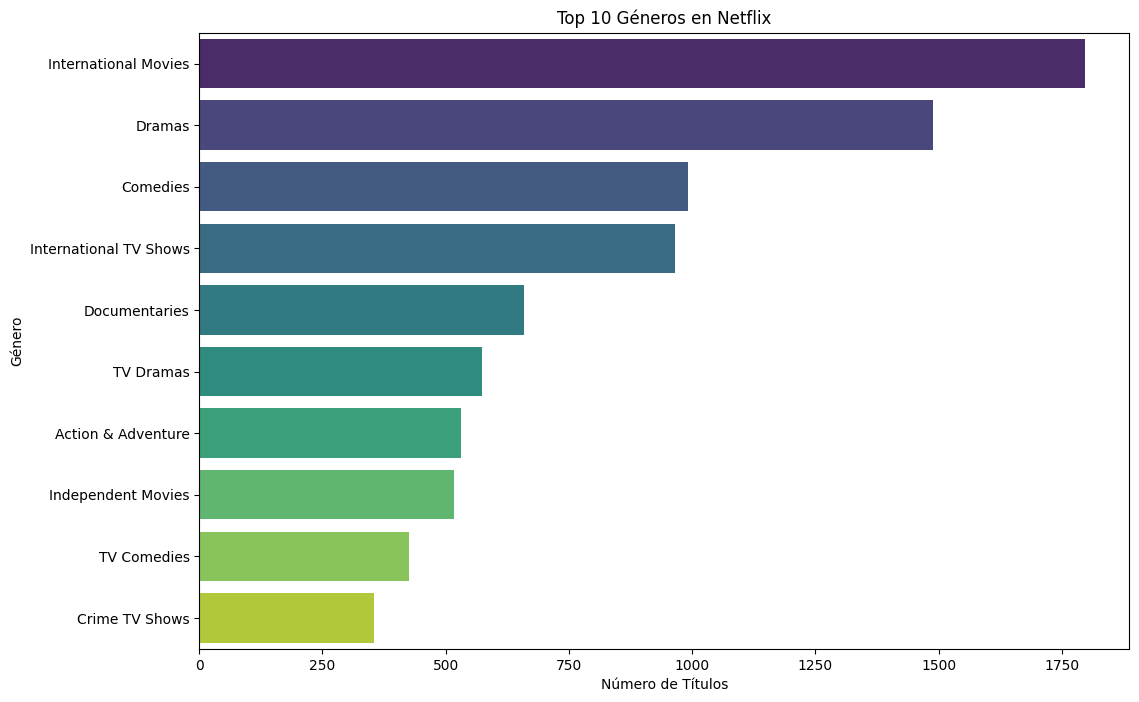

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Dividir los géneros en listas
df['genre_list'] = df['listed_in'].apply(lambda x: x.split(', '))

# Explode la columna genre_list para tener una fila por cada género
df_genres = df.explode('genre_list')

# Contar la frecuencia de cada género
genre_counts = df_genres['genre_list'].value_counts()

# Seleccionar los 10 géneros más frecuentes
top_genres = genre_counts.head(10)

# Visualización
plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Géneros en Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Género')
plt.show()

# Pregunta 2: Evolución del Contenido en ***Netflix*** a lo Largo del Tiempo

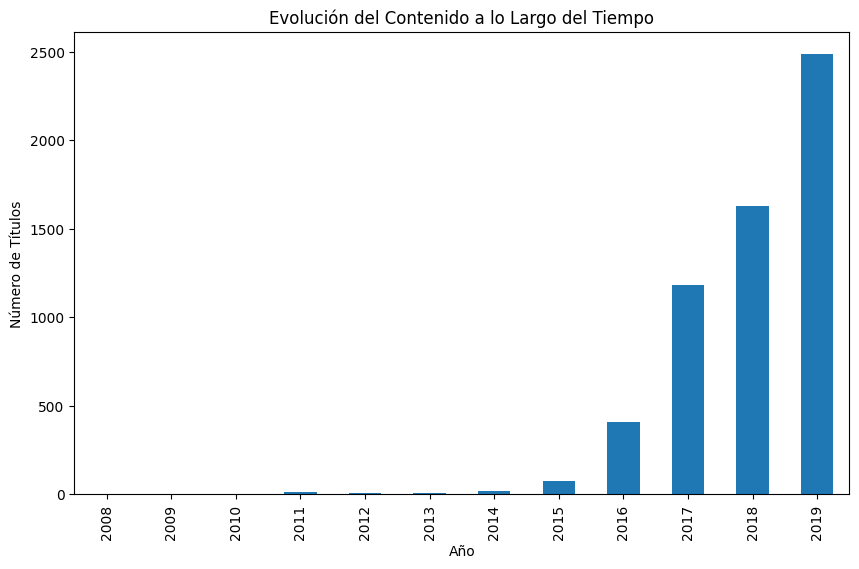

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df['year_added'] = pd.DatetimeIndex(df['date_added']).year
titles_by_year = df['year_added'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
titles_by_year.plot(kind='bar')
plt.title('Evolución del Contenido a lo Largo del Tiempo')
plt.xlabel('Año')
plt.ylabel('Número de Títulos')
plt.show()

# Pregunta 3: Relación entre País de Origen y Popularidad

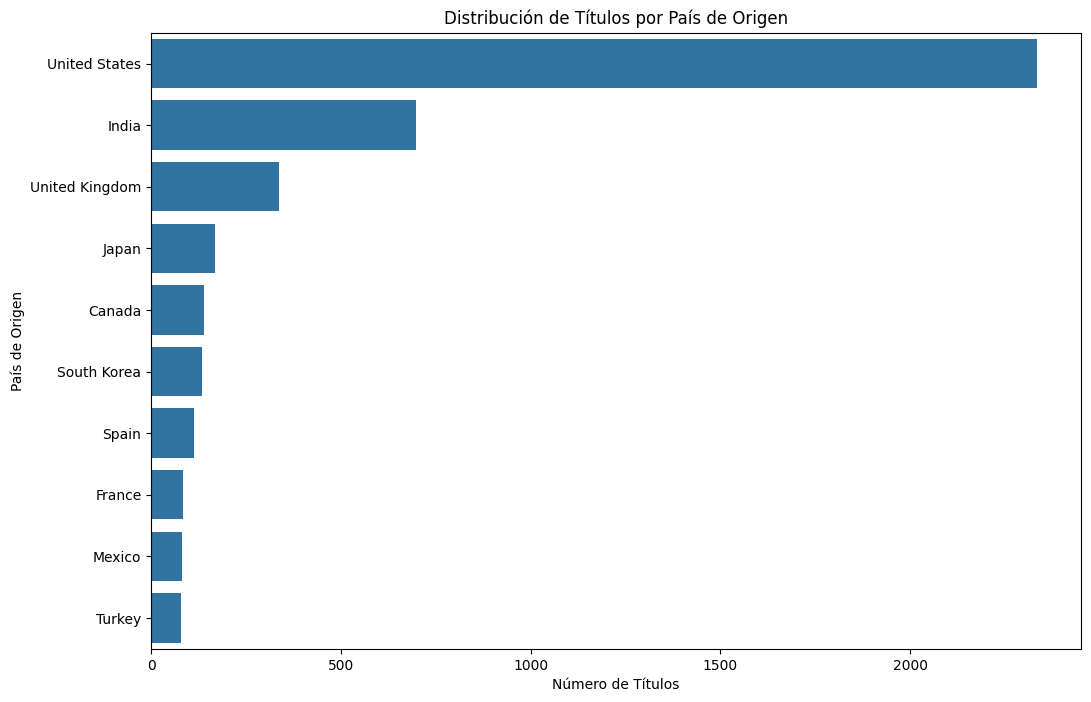

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df['country'].value_counts().head(10).index
df_top_countries = df[df['country'].isin(top_countries)]
plt.figure(figsize=(12, 8))
sns.countplot(y='country', data=df_top_countries, order=df_top_countries['country'].value_counts().index)
plt.title('Distribución de Títulos por País de Origen')
plt.xlabel('Número de Títulos')
plt.ylabel('País de Origen')
plt.show()

# Pregunta 4:  Distribución de las clasificaciones de audiencia entre películas y series

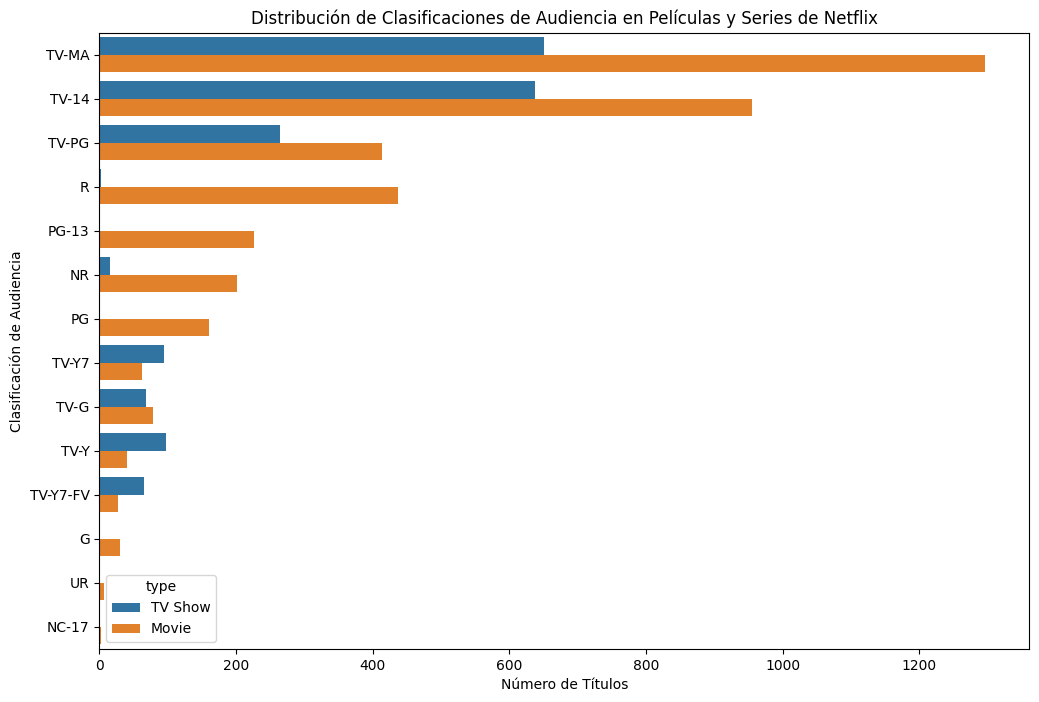

In [ ]:
plt.figure(figsize=(12, 8))
sns.countplot(y='rating', hue='type', data=df, order=df['rating'].value_counts().index)
plt.title('Distribución de Clasificaciones de Audiencia en Películas y Series de Netflix')
plt.xlabel('Número de Títulos')
plt.ylabel('Clasificación de Audiencia')
plt.show()

# Pregunta 5: Distribución de la duración de películas y series en ***Netflix***

In [ ]:
# Filtrar por tipo
movies = df[df['type'] == 'Movie']
tv_shows = df[df['type'] == 'TV Show']

In [ ]:
# Extraer la duración en minutos (para películas)
movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)

<ipython-input-20-fbf836dca99e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['duration'] = movies['duration'].str.extract('(\d+)').astype(float)


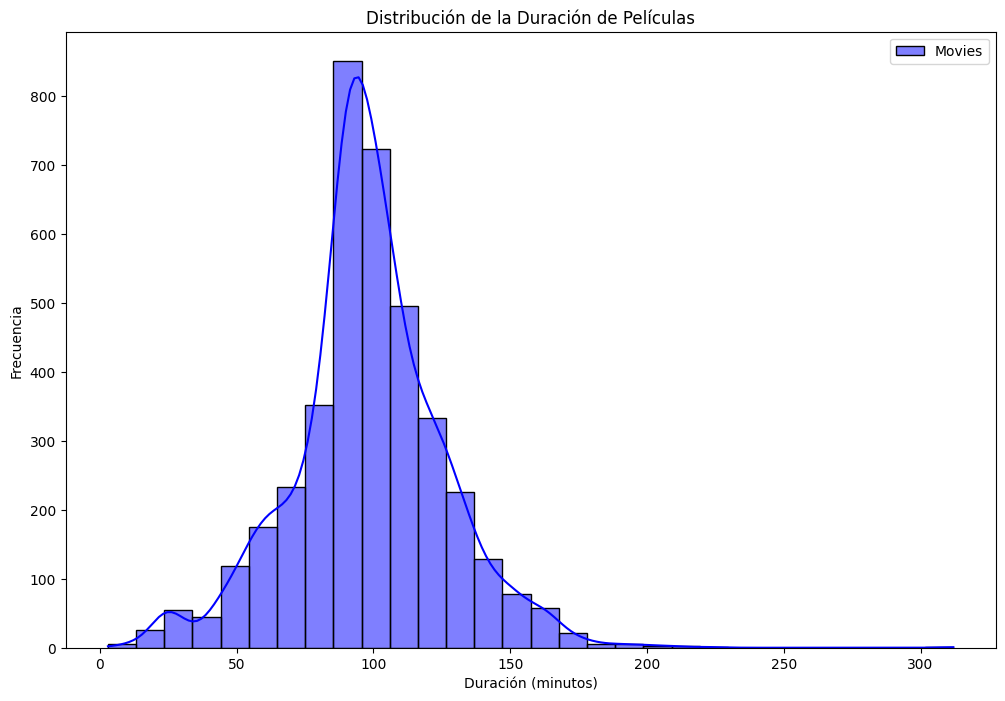

In [ ]:
# Visualización Películas
plt.figure(figsize=(12, 8))
sns.histplot(movies['duration'].dropna(), kde=True, color='blue', label='Movies', bins=30)
plt.title('Distribución de la Duración de Películas')
plt.xlabel('Duración (minutos)')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

<ipython-input-22-87762f68bbc8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)


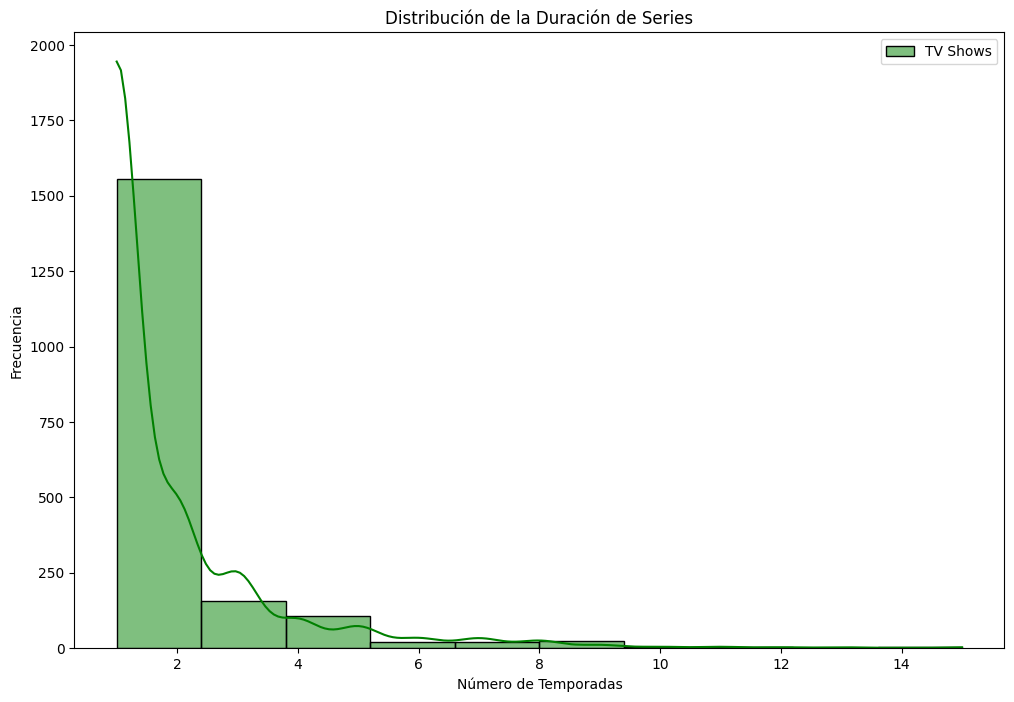

In [ ]:
# Visualización Series
tv_shows['seasons'] = tv_shows['duration'].str.extract('(\d+)').astype(float)
plt.figure(figsize=(12, 8))
sns.histplot(tv_shows['seasons'].dropna(), kde=True, color='green', label='TV Shows', bins=10)
plt.title('Distribución de la Duración de Series')
plt.xlabel('Número de Temporadas')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

# Pregunta 6: Relación entre el año de lanzamiento y la cantidad de contenido añadido a ***Netflix***

In [79]:
# Convertir 'date_added' a datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [80]:
# Agrupar por año y contar la cantidad de títulos añadidos cada año
df['year_added'] = df['date_added'].dt.year
yearly_additions = df['year_added'].value_counts().sort_index()

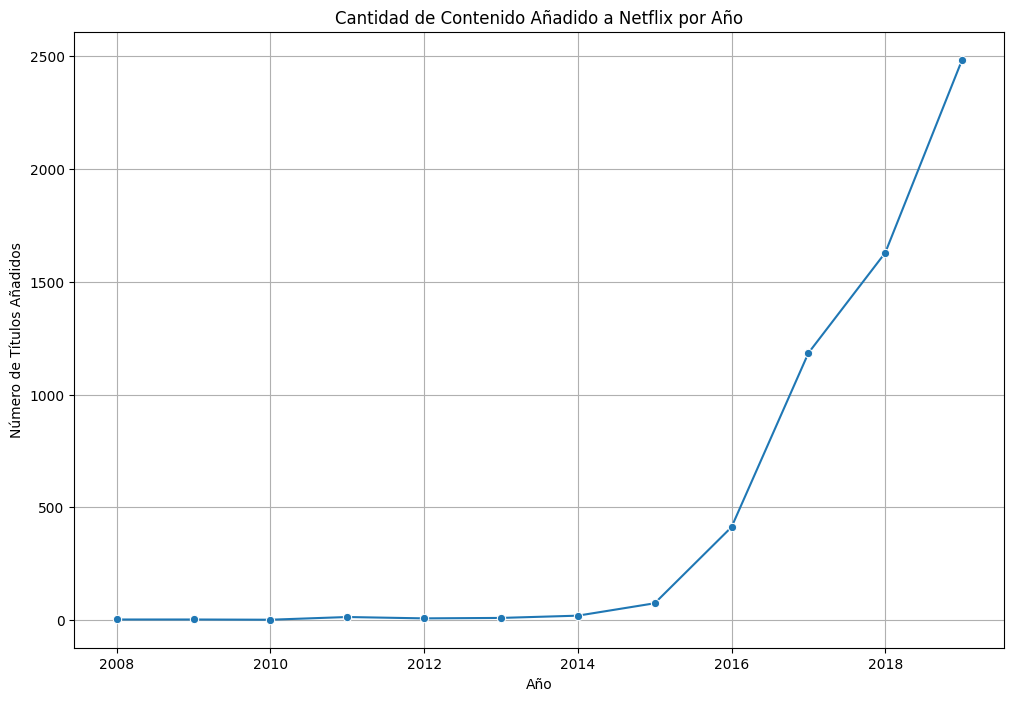

In [81]:
# Visualización
plt.figure(figsize=(12, 8))
sns.lineplot(x=yearly_additions.index, y=yearly_additions.values, marker='o')
plt.title('Cantidad de Contenido Añadido a Netflix por Año')
plt.xlabel('Año')
plt.ylabel('Número de Títulos Añadidos')
plt.grid(True)
plt.show()

In [82]:
# Resúmenes numéricos
summary_stats = df.describe()
print(summary_stats)

            show_id                     date_added  release_year   year_added  \
count  5.837000e+03                           5837   5837.000000  5837.000000   
mean   7.730079e+07  2018-07-16 10:44:08.346753536   2013.688539  2017.992291   
min    2.698800e+05            2008-01-01 00:00:00   1925.000000  2008.000000   
25%    8.004520e+07            2017-10-13 00:00:00   2013.000000  2017.000000   
50%    8.016353e+07            2018-10-02 00:00:00   2016.000000  2018.000000   
75%    8.024188e+07            2019-07-04 00:00:00   2018.000000  2019.000000   
max    8.122720e+07            2019-11-30 00:00:00   2020.000000  2019.000000   
std    9.479777e+06                            NaN      8.419088     1.158058   

           success  duration_number  
count  5837.000000      5837.000000  
mean      0.408772        66.738736  
min       0.000000         1.000000  
25%       0.000000         2.000000  
50%       0.000000        86.000000  
75%       1.000000       104.000000  
max 

#**Propuesta de Modelos de Resolución**

In [ ]:
# Identificar todas las columnas categóricas
categorical_columns = df.select_dtypes(include=[object]).columns


In [ ]:
# Aplanar listas en cada columna categórica
for column in categorical_columns:
    df[column] = df[column].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Seleccionar características y target
features = df.drop(columns=['success', 'title', 'description', 'date_added'])
target = df['success']

In [ ]:
# Identificar columnas numéricas y categóricas
numeric_features = features.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = features.select_dtypes(include=[object]).columns.tolist()

In [ ]:
# Crear preprocesador para manejar datos categóricos y numéricos
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

In [ ]:
# Dividir datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)

In [ ]:
# Crear pipeline
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
# Entrenar el modelo
model.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', SimpleImputer(),
                                                  ['show_id', 'release_year',
                                                   'year_added',
                                                   'duration_number']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['cast', 'country', 'rating',
                                                   'duration', 'listed_in',
                                                   'type', 'genre_list',
                                                   'duration_unit'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'Precision: {precision_score(y_test, y_pred)}')
print(f'Recall: {recall_score(y_test, y_pred)}')
print(f'F1-Score: {f1_score(y_test, y_pred)}')

Accuracy: 0.9988584474885844
Precision: 1.0
Recall: 0.997229916897507
F1-Score: 0.9986130374479889
